In [1]:
import numpy as np
import pandas as pd

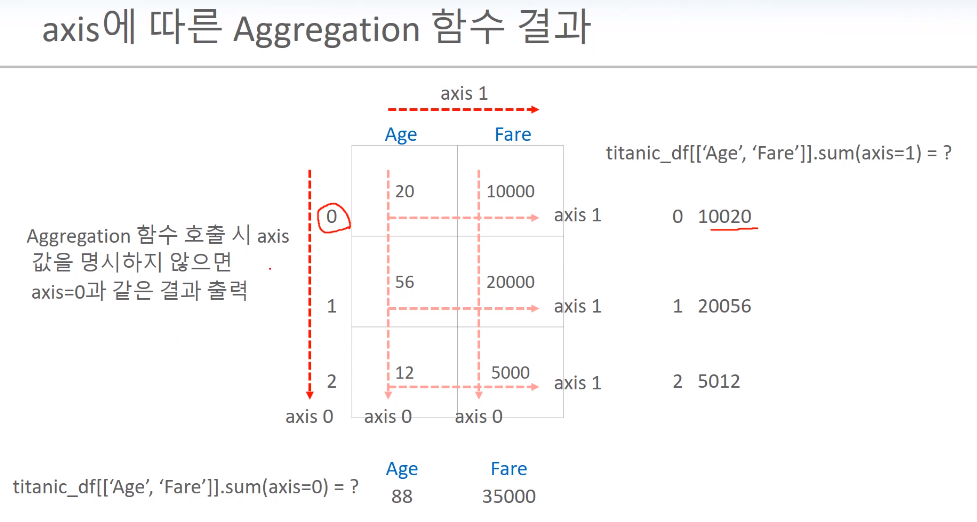

In [2]:
titanic_df = pd.read_csv('titanic_train.csv')

In [3]:
# NaN 값은 count에서 제외
titanic_df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [10]:
titanic_df[['Age', 'Fare']].mean(axis=0)

Age     29.699118
Fare    32.204208
dtype: float64

In [11]:
titanic_df[['Age', 'Fare']].mean(axis=1)

0      14.62500
1      54.64165
2      16.96250
3      44.05000
4      21.52500
         ...   
886    20.00000
887    24.50000
888    23.45000
889    28.00000
890    19.87500
Length: 891, dtype: float64

In [7]:
titanic_df[['Age', 'Fare']].sum()

Age     21205.1700
Fare    28693.9493
dtype: float64

In [8]:
titanic_df[['Age', 'Fare']].count()

Age     714
Fare    891
dtype: int64

### groupby

In [12]:
titanic_groupby = titanic_df.groupby(by='Pclass')

In [14]:
print(type(titanic_groupby))
print(titanic_groupby)

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [16]:
titanic_groupby = titanic_df.groupby(by='Pclass').count()
print(titanic_groupby)

        PassengerId  Survived  Name  Sex  Age  SibSp  Parch  Ticket  Fare  \
Pclass                                                                      
1               216       216   216  216  186    216    216     216   216   
2               184       184   184  184  173    184    184     184   184   
3               491       491   491  491  355    491    491     491   491   

        Cabin  Embarked  
Pclass                   
1         176       214  
2          16       184  
3          12       491  


In [17]:
# 위에서 Pclass가 index가 된 것을 알 수 있다.
print(type(titanic_groupby))
print(titanic_groupby.shape)
print(titanic_groupby.index)

<class 'pandas.core.frame.DataFrame'>
(3, 11)
Int64Index([1, 2, 3], dtype='int64', name='Pclass')


In [18]:
titanic_groupby = titanic_df.groupby(by='Pclass')[['PassengerId', 'Survived']].count()
titanic_groupby

,PassengerId,Survived
Pclass,,
1,216,216
2,184,184
3,491,491


In [20]:
titanic_df[['Pclass', 'PassengerId', 'Survived']].groupby(by='Pclass').count()

,PassengerId,Survived
Pclass,,
1,216,216
2,184,184
3,491,491


In [22]:
titanic_df.groupby(by='Pclass')['Pclass'].count()

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64

In [23]:
titanic_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [24]:
titanic_df.groupby(by='Pclass')['Age'].agg([max, min])

,max,min
Pclass,,
1,80.0,0.92
2,70.0,0.67
3,74.0,0.42


In [27]:
age_format = {'Age':'max', 'SibSp':'sum', 'Fare':'mean'}
titanic_df.groupby('Pclass').agg(age_format)

,Age,SibSp,Fare
Pclass,,,
1,80.0,90,84.154687
2,70.0,74,20.662183
3,74.0,302,13.675550
